## Packages

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [74]:
data = pd.read_csv('/home/bibekg/Learning/AQI_COL/Air-Quality-Prediction/airprediction/Data/Real-Data/Real_Combine.csv')

# Reading first 5 rows
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,AQI
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


### Checking fot Null Values

<AxesSubplot:>

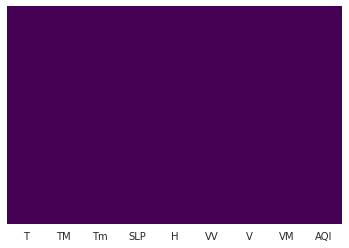

In [75]:
data.isnull().sum()

# if we have minimum null values we can drop null values
data = data.dropna()
# We don`t have null values

# Plotting the Null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Dividing the Features

In [76]:
X = data.drop(['AQI'], axis=1) # Droping the Target Variable i.e. AQI
Y = pd.DataFrame(data['AQI']) # Assigning the Target Vatiavle to Y

In [77]:
# Checking Null Value for Target Variable
Y.isnull().sum()

AQI    0
dtype: int64

### Finding the correlation

In [78]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,AQI
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
AQI,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


CPU times: user 11.6 s, sys: 213 ms, total: 11.8 s
Wall time: 11.5 s


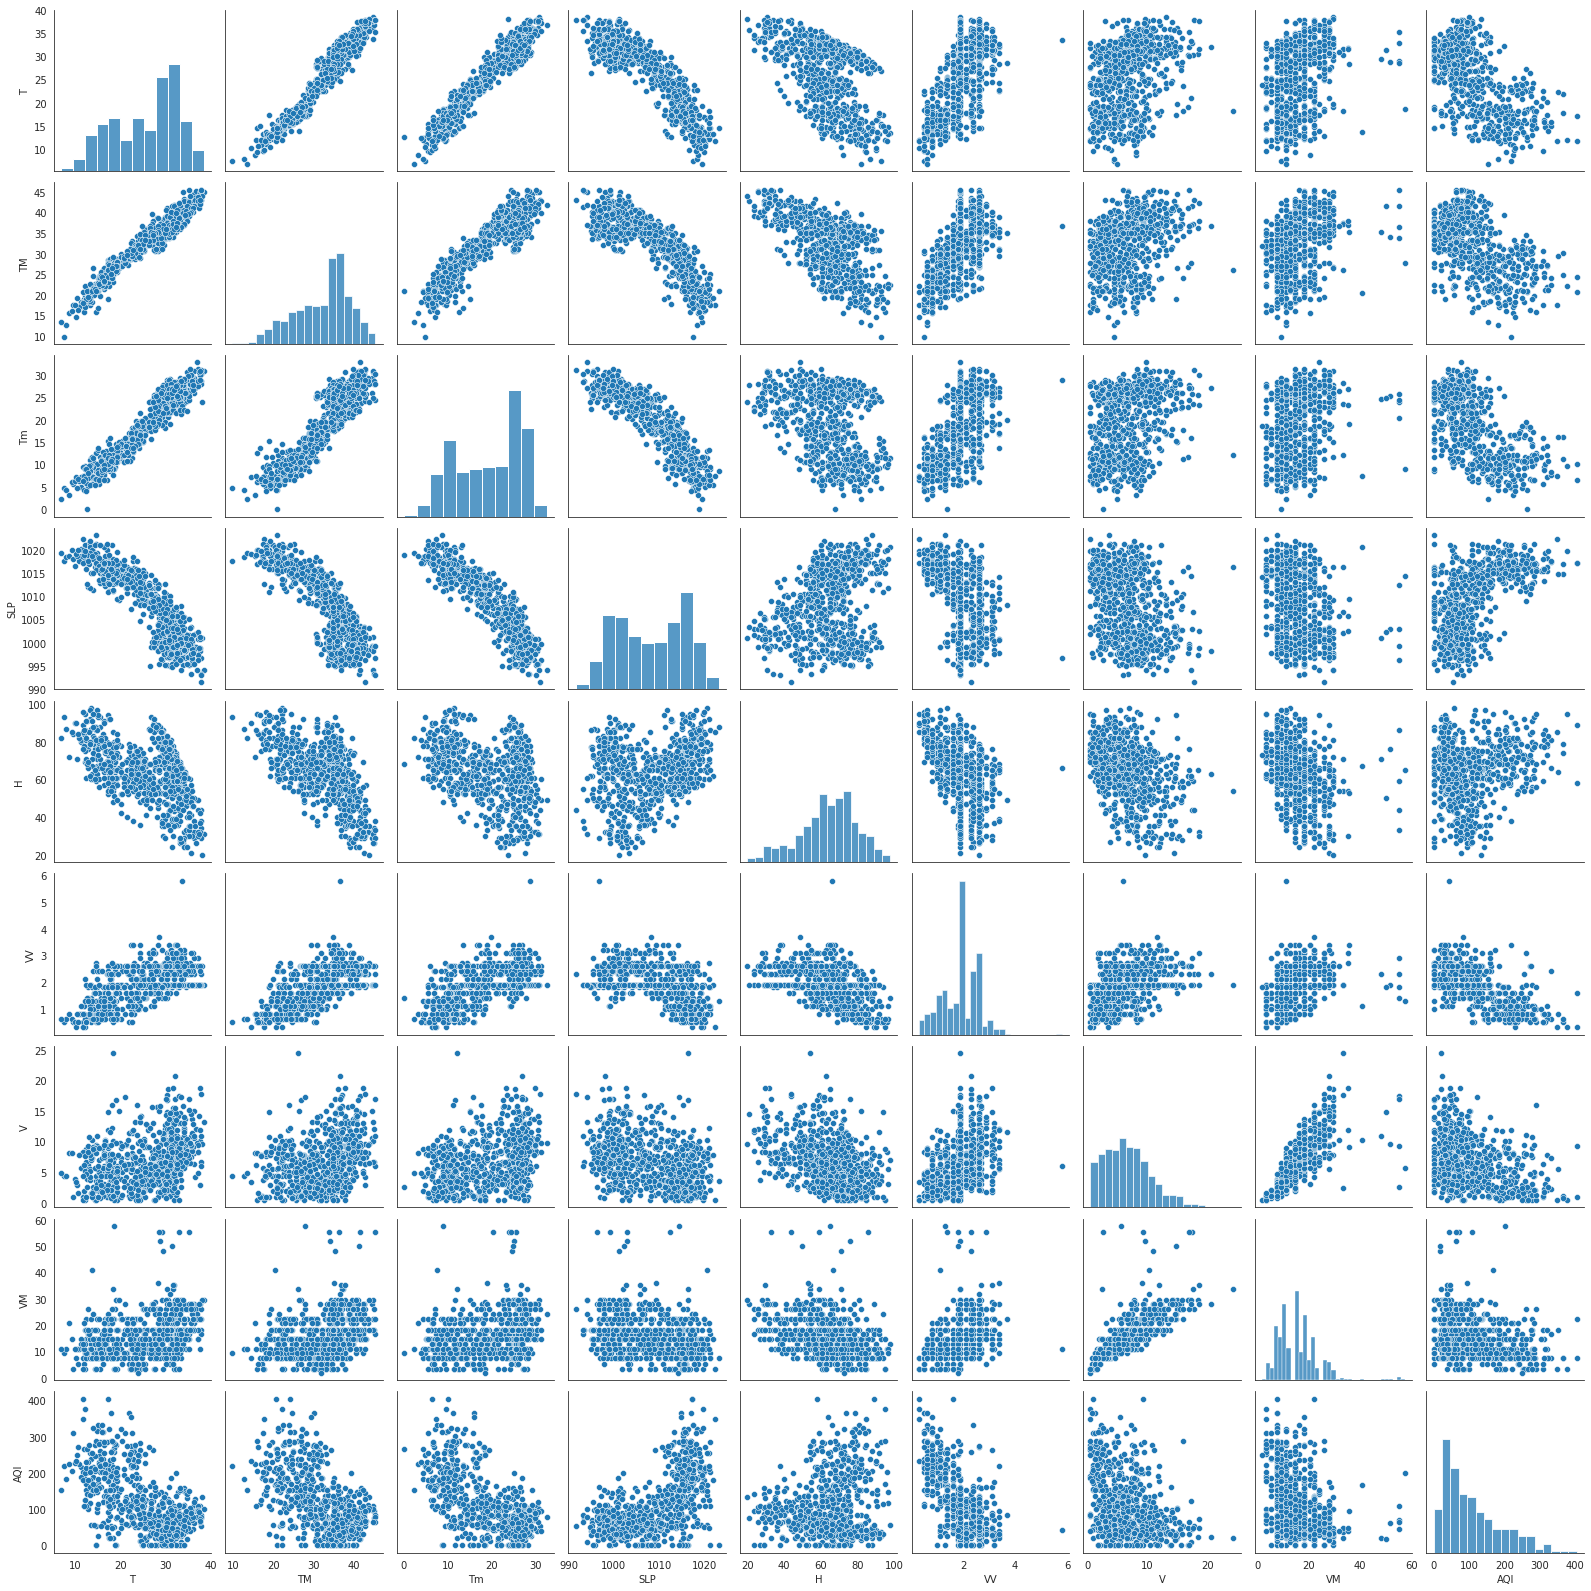

In [79]:
%%time
sns.pairplot(data)

### Correlation Matrix with Heatmap

In [80]:
# Since the above table is repetitive ; in order to see only the single value; thisis done
mask1 = np.zeros_like(data.corr()) # This will create a table of 0 similar to the size of Data.corr()
triangle_indices= np.triu_indices_from(mask1) #
mask1[triangle_indices] = True # This will make the top triangle values true
mask1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

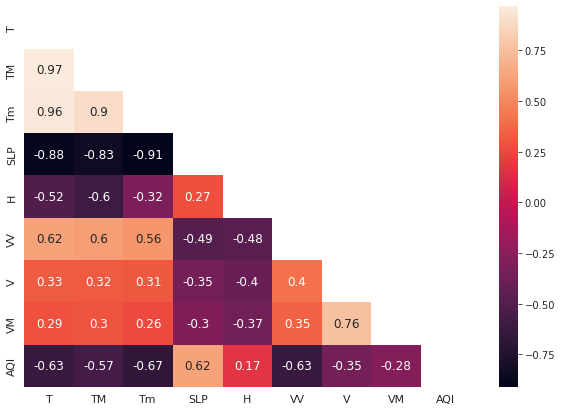

In [81]:
plt.figure(figsize=[10,7])
sns.heatmap(data.corr(), mask = mask1, annot=True, annot_kws={"size":12})
# annot is use to display the values of the relations
# annot_kws (Keyword_size) is use to change the size
sns.set_style('white')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [82]:
from sklearn.ensemble  import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [83]:
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [84]:
# This is used when we have many features and we have to select top 10 featues from the DataSet
fea_impotance = pd.DataFrame({
                                 'Features': X.columns,
                                 'Feature_Imp' : model.feature_importances_
                                 })
fea_impotance

,Features,Feature_Imp
0,T,0.157192
1,TM,0.100069
2,Tm,0.182414
3,SLP,0.138807
4,H,0.082677
5,VV,0.244282
6,V,0.054248
7,VM,0.040310


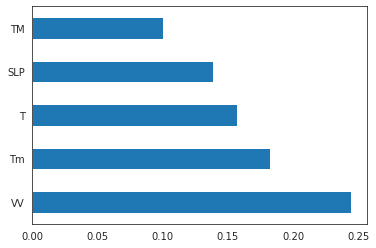

In [85]:
# Plotting the Graph of FEATURE IMPORTANCE for better visualisation
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

<AxesSubplot:ylabel='Density'>

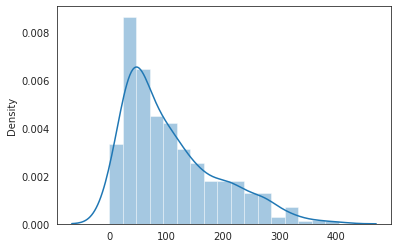

In [86]:
# Plotting the Target Variable
sns.distplot(Y)

## Implementing the Linear Regression Model

#### Train Test Data Split

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=0)

#### Loading the Model

In [88]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

#### Calculating r^2

In [89]:
# Calculating the r_squared
r_squared = reg.score(X_train,Y_train)
# R_Squared value should be close to 1
print(f'Coefficient of determination r^2 on Training Data {r_squared}')

Coefficient of determination r^2 on Training Data 0.6004702969010588


In [90]:
# Calculating the r_squared
r_squared = reg.score(X_test,Y_test)
# R_Squared value should be close to 1
print(f'Coefficient of determination r^2 on Testing Data {r_squared}')

Coefficient of determination r^2 on Testing Data 0.5317588607792592


In [91]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(reg, X,Y, cv=5)
# This means we have a total of 730 rows
# cv=5 means we will be dividing the dataset into two parts 730/5 = 146
# in first iteration first 146 rows will act as Test Data set and remaining will acts as training DataSet
# in second iteration second 146 rows will act as Test Data set and remaining will acts as training DataSet
# This will continue untill the last 146 rows acts as Test Data set and remaining will acts as training DataSet

In [92]:
score.mean()

0.46724362258523333

#### As we know
Y = M*X + C

where M = slope/Coefficient

C = Constant/Intercept

In [93]:
# Calculating the Coefficient/SLopw of all Feature
reg.coef_

array([[ 2.64321492e+00,  5.53275815e-01, -7.63242259e+00,
         4.86949931e-01, -8.32054723e-01, -5.06049823e+01,
        -2.72686318e+00, -3.85129915e-02]])

In [94]:
# Calculating the Intercept
reg.intercept_

array([-151.78408884])

In [95]:
# Converting/ Transforming into similar Size

X_col = np.reshape(X.columns, (8,1))
print(X_col.shape)

coeff = np.reshape(reg.coef_, (8,1))
print(coeff.shape)
coeff

(8, 1)
(8, 1)


array([[ 2.64321492e+00],
       [ 5.53275815e-01],
       [-7.63242259e+00],
       [ 4.86949931e-01],
       [-8.32054723e-01],
       [-5.06049823e+01],
       [-2.72686318e+00],
       [-3.85129915e-02]])

### Model Evaluation

In [96]:
coeff_data = pd.DataFrame(coeff, X_col , columns=['Coefficient'])
coeff_data

,Coefficient
"(T,)",2.643215
"(TM,)",0.553276
"(Tm,)",-7.632423
"(SLP,)",0.486950
"(H,)",-0.832055
"(VV,)",-50.604982
"(V,)",-2.726863
"(VM,)",-0.038513


#### Interpretation

This means if T is increasing by 1 unit and keeping all other features constant, 'PM2.5' will increase by 2.6 units

Similarly if Tm is increasing by 1 unit and keeping all other features constant, 'PM2.5' will decrease by 7.6 units

### Plotting the difference

In [97]:
prediction = reg.predict(X_test)

<AxesSubplot:ylabel='Density'>

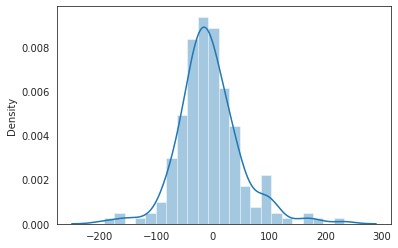

In [98]:
sns.distplot(Y_test-prediction)

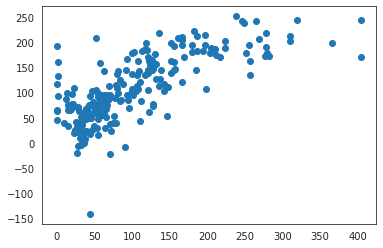

In [99]:
plt.scatter(Y_test,prediction)

In [100]:
# Calculting some of the Errors
from sklearn import metrics

In [101]:
print(f'MAE: {metrics.mean_absolute_error(Y_test,prediction)}')
print(f'MSE: {metrics.mean_squared_error(Y_test,prediction)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test,prediction))}')

MAE: 40.2720737469565
MSE: 3056.750190456649
RMSE: 55.28788466252483


### Creating PKL FileFormat for deployment purpose

In [102]:
import pickle

In [103]:
# Open a file 
file = open('regression_linear.pkl', 'wb')

# dump information to that file
pickle.dump(reg,file)